In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle as w
import explore as e

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1) As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
zillow = w.wrangle_zillow()

In [3]:
zillow.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941,LA
6,3,4.0,1620,847770,2011,10244,LA
7,3,2.0,2077,646760,1926,7924,LA
11,0,0.0,1200,5328,1972,91,LA
14,0,0.0,171,6920,1973,255,LA


2) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
train, validate, test = w.split_data(zillow)

In [5]:
train.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county
223187,4,2.5,2019,473328,1947,5241,Orange
1191302,3,2.0,1324,358878,1969,4324,LA
2095836,1,1.0,864,183756,1922,2526,Orange
2102262,4,3.0,1952,743234,1941,9061,LA
547931,4,3.0,2524,363913,1977,3761,Orange


3) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [41]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})
    plt.show()

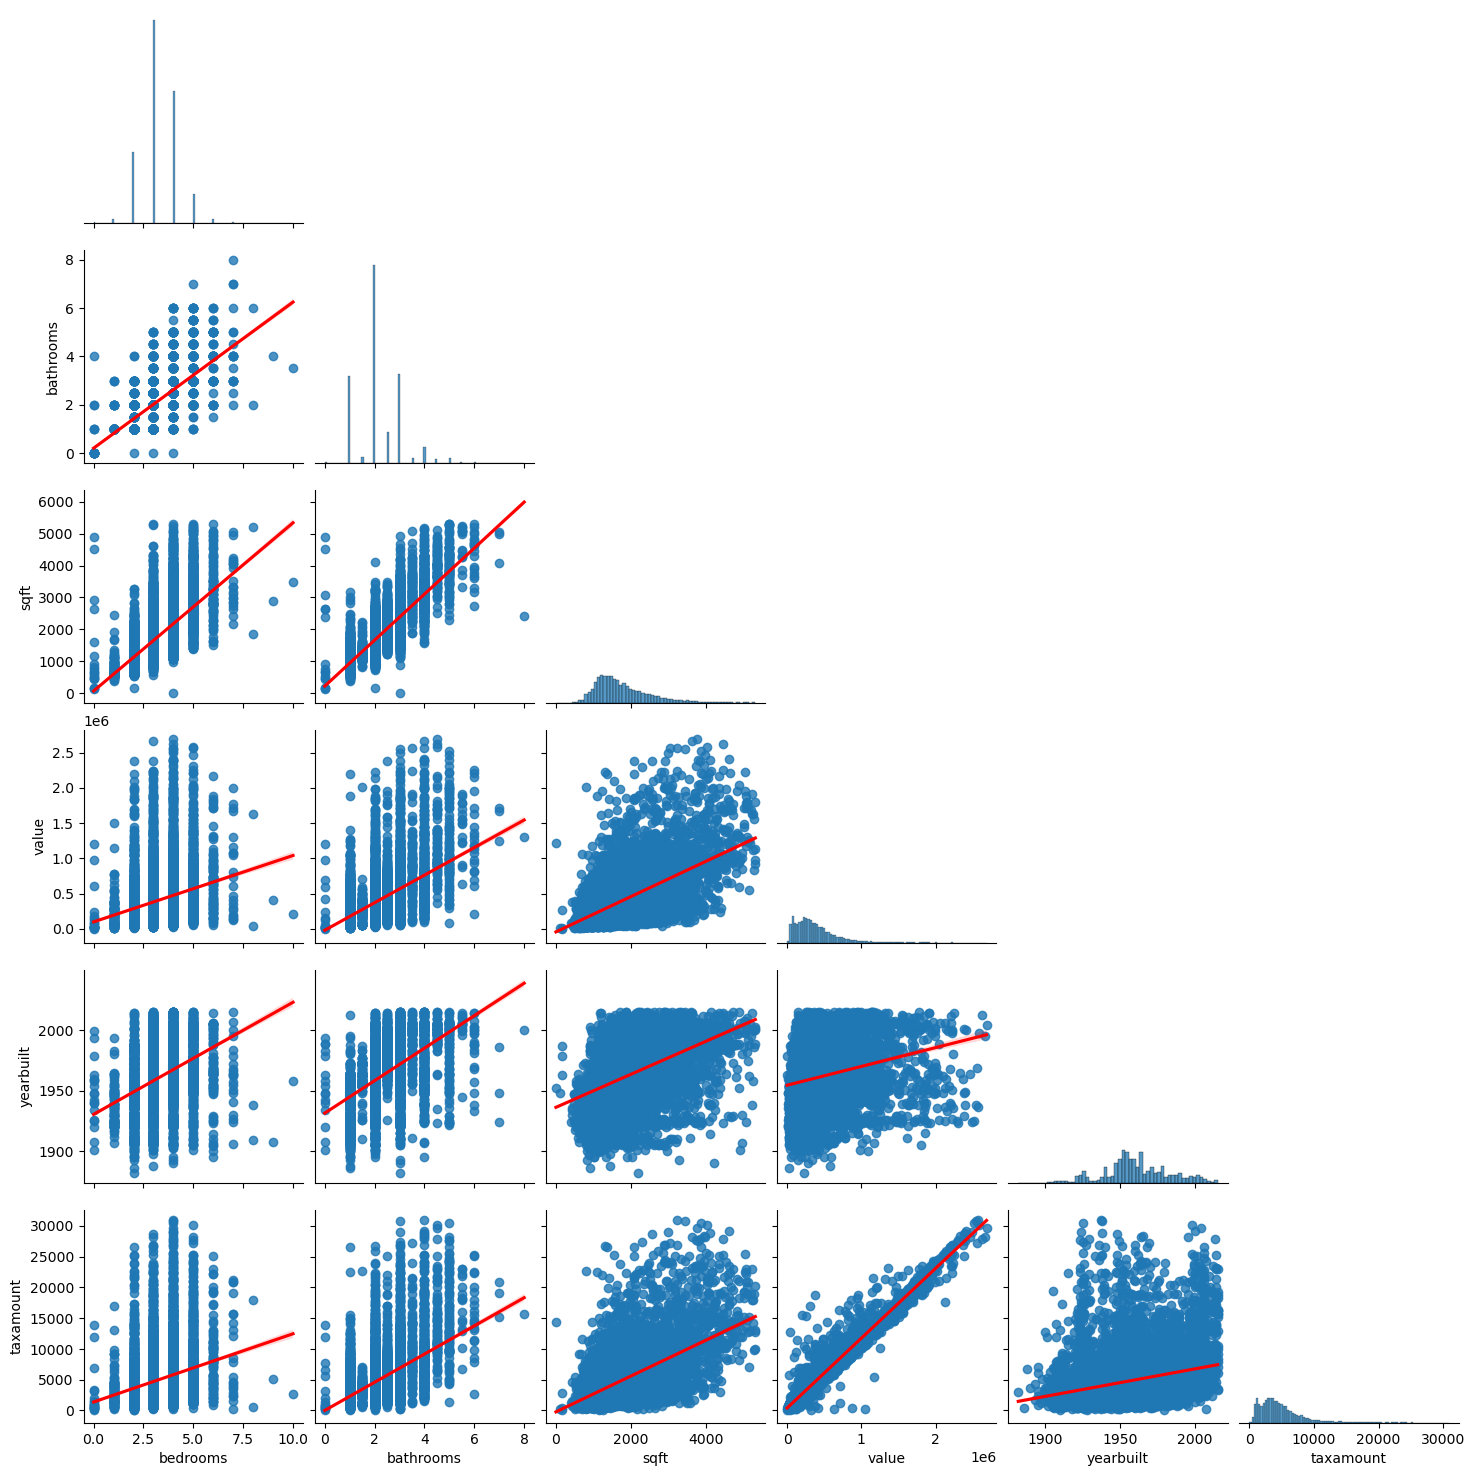

In [43]:
plot_variable_pairs(train.sample(10_000))

In [ ]:
# def plot_variable_pairs(df, target):
#     for i, col in enumerate(df):
#         plt.figure(figsize=)
#         plt.subplot(23(i+1))
#         sns.lmplot(data=train, x='exam1', y='final_grade',
#               line_kws={'color':'red'})
#         plt.show()

4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [84]:
def plot_categorical_and_continuous_vars(df, cat, cont):
    plt.figure(figsize=(13,4))
    plt.suptitle(f'Visualizations for {cat.capitalize()} vs. {cont.capitalize()}')
    plt.subplot(131)
    sns.boxplot(data=df, x=df[cat], y=df[cont])
    plt.subplot(132)
    sns.violinplot(data=df, x=df[cat], y=df[cont])
    plt.subplot(133)
    sns.barplot(data=df, x=df[cat], y=df[cont])
    plt.show()

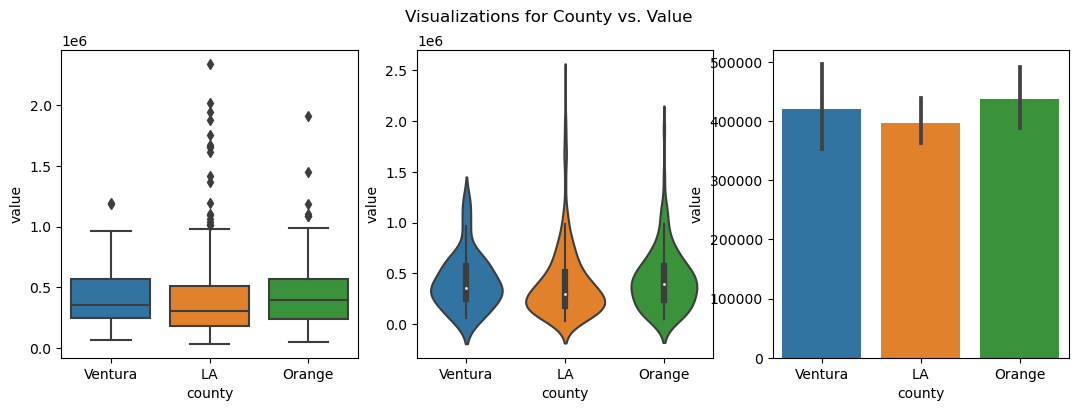

In [85]:
plot_categorical_and_continuous_vars(train.sample(500), 'county', 'value')

5) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [32]:
#Done!

6) Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

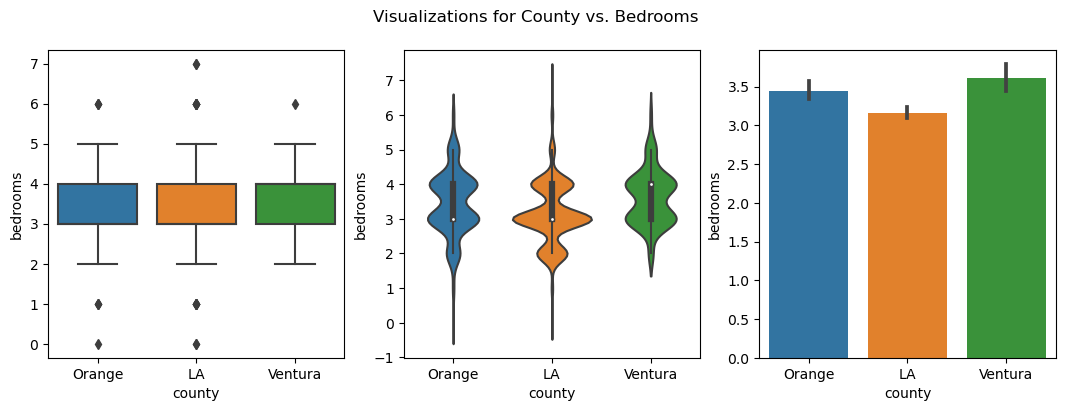

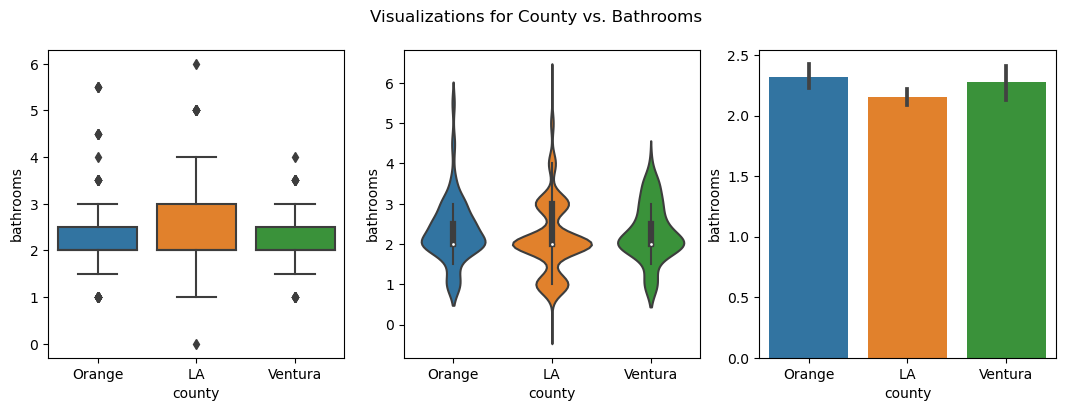

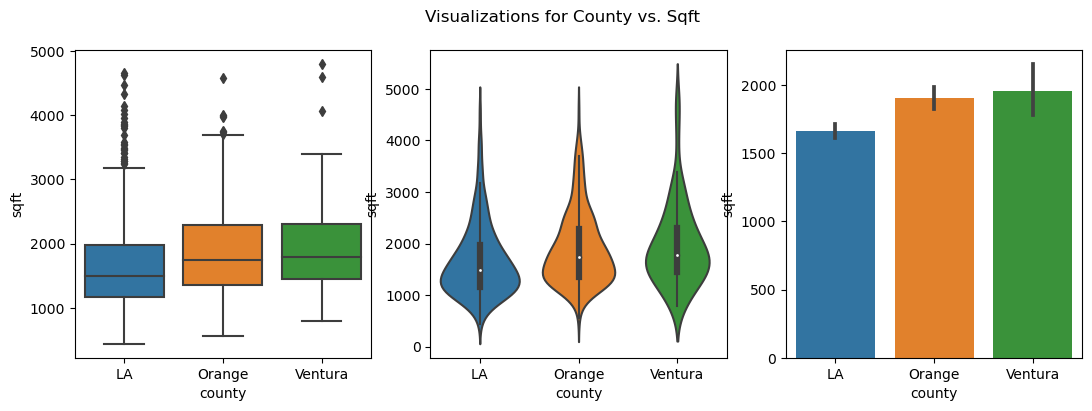

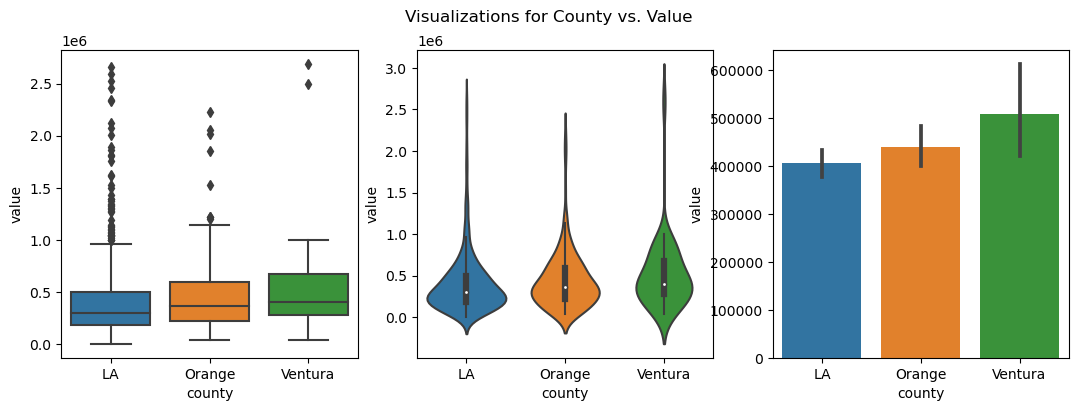

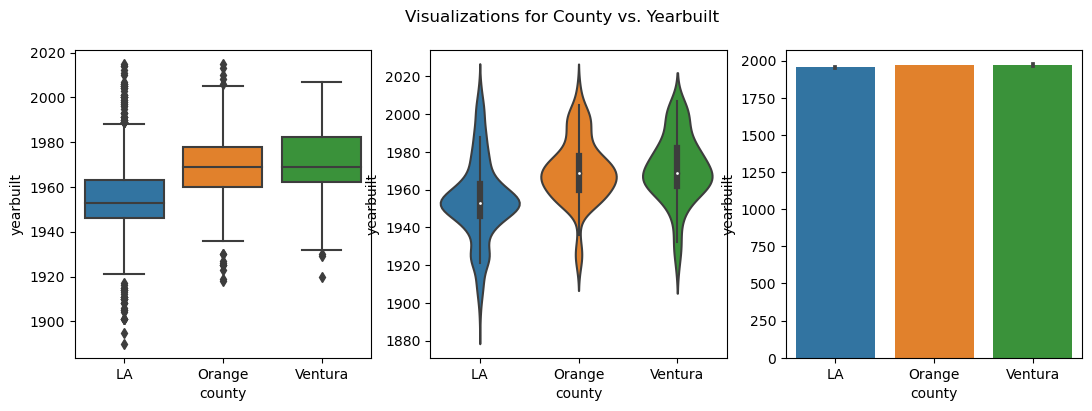

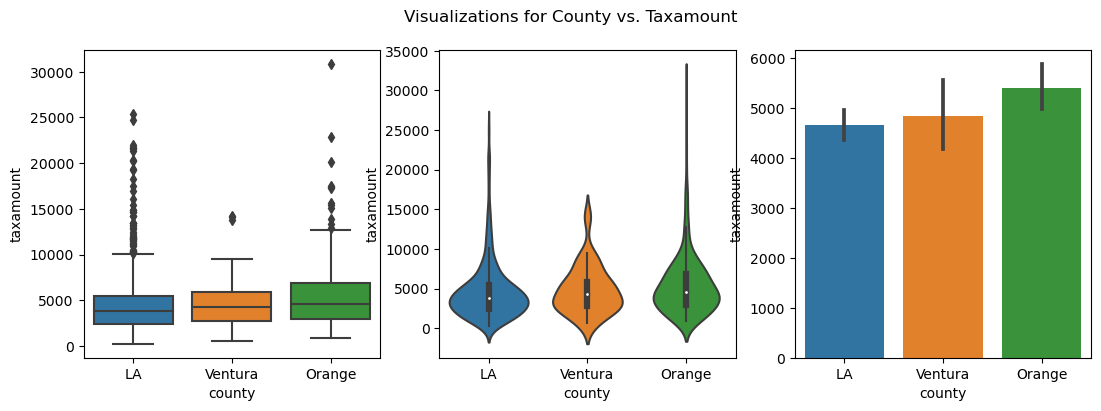

In [86]:
for col in train:
    if col != 'county':
        plot_categorical_and_continuous_vars(train.sample(1_000), 'county', col)

7) Come up with some initial hypotheses based on your goal of predicting property value.

$H_0$: There is no correlation between value and number of bedrooms.

$H_\alpha$: There is a correlation between value and number of bedrooms.

---

$H_0$: There is no correlation between value and taxamount.

$H_\alpha$: There is a correlation between value and taxamount.

8) Visualize all combinations of variables in some way.

In [59]:
train.county.value_counts()

LA         840424
Orange     326005
Ventura     97093
Name: county, dtype: int64

In [60]:
840424/len(train), 326005/len(train), 97093/len(train)

(0.6651439389262712, 0.2580129194426373, 0.0768431416310915)

In [75]:
train_LA = train[train.county == 'LA'].sample(10_000)
train_Orange = train[train.county == 'Orange'].sample(10_000)
train_Ventura = train[train.county == 'Ventura'].sample(10_000)

In [76]:
train_alpha = pd.concat([train_LA, train_Orange, train_Ventura])

In [77]:
train_alpha.county.value_counts()

LA         10000
Orange     10000
Ventura    10000
Name: county, dtype: int64

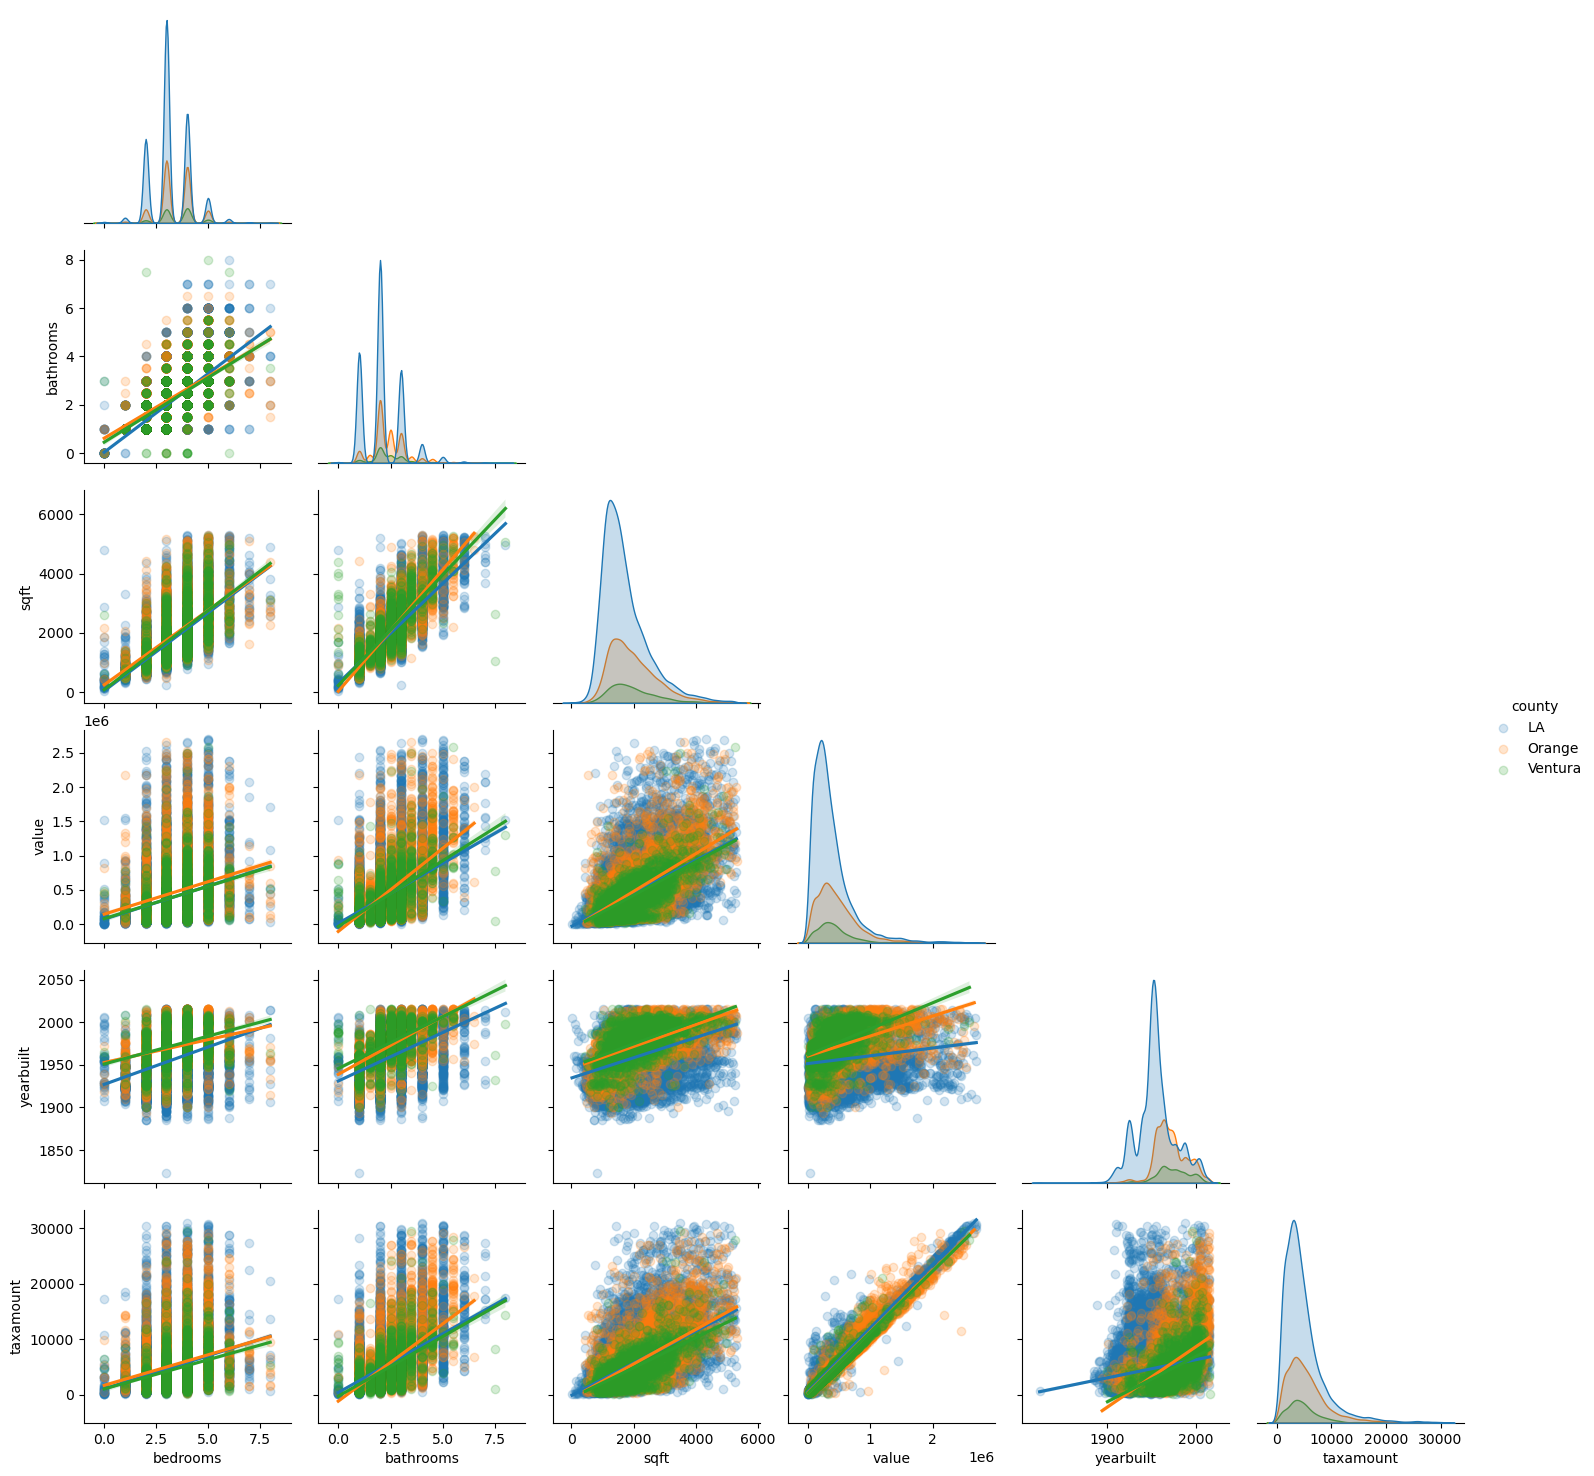

In [82]:
sns.pairplot(train.sample(30_000), hue='county', corner=True, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})
plt.show()

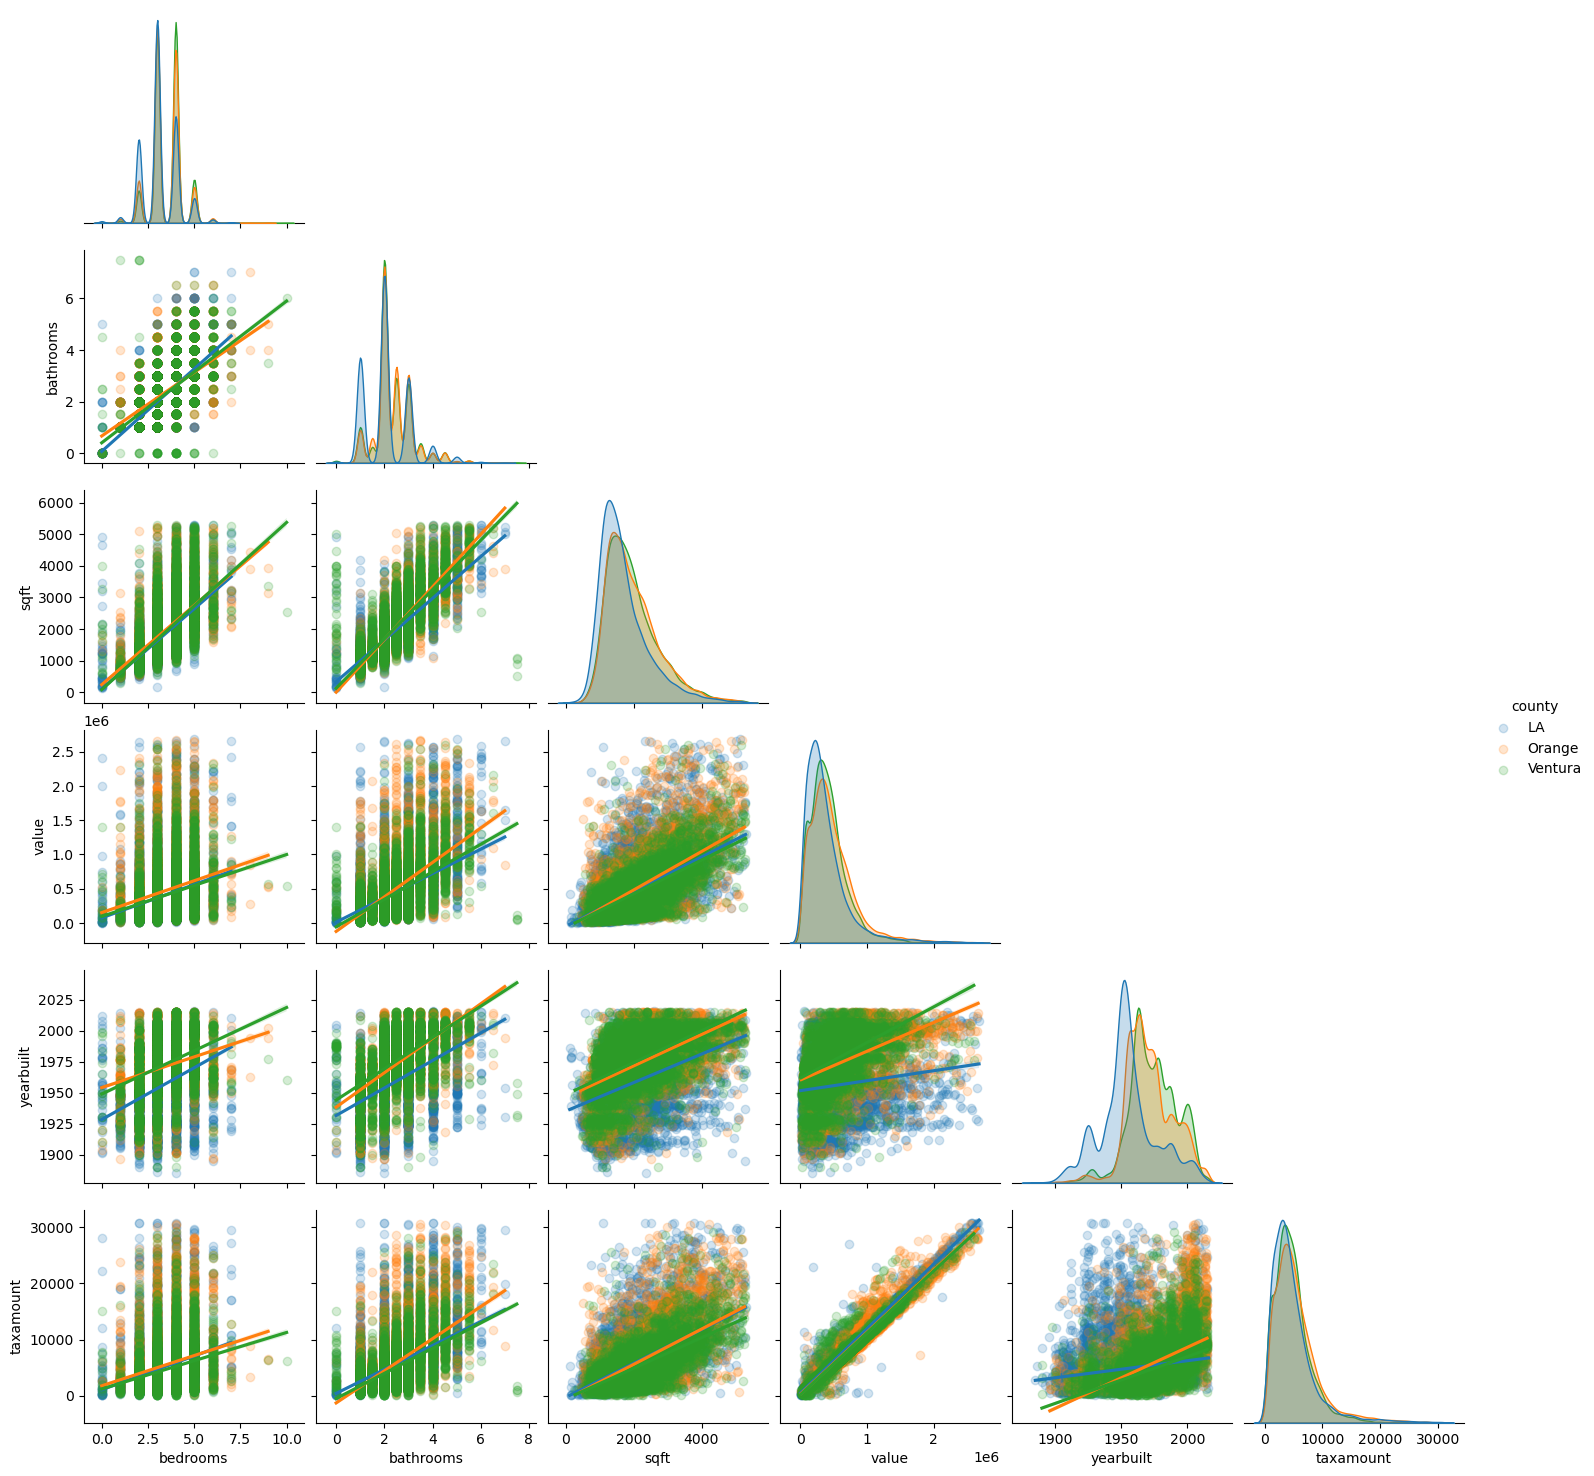

In [83]:
sns.pairplot(train_alpha, hue='county', corner=True, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})
plt.show()

9) Run the appropriate statistical tests where needed.

Running Pearson's for true continuous variables, and Spearman's for discrete variables that I want to treat as continuous. 

In [90]:
for col in train.drop(columns=['county', 'bathrooms', 'bedrooms']):
    if col != 'value':
        r, p = pearsonr(train[col], train.value)
        print(f'For {col} vs value, p-value is: {p} and correlation is: {r}')
        print()

For sqft vs value, p-value is: 0.0 and correlation is: 0.5819090599559038

For yearbuilt vs value, p-value is: 0.0 and correlation is: 0.2584876936216838

For taxamount vs value, p-value is: 0.0 and correlation is: 0.9804566439492688



In [106]:
train[ train.sqft < 500]

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county
2141730,1,1.0,346,203049,1934,2591,LA
69299,1,1.0,432,19207,1925,444,LA
624420,0,0.0,40,9803,2005,165,LA
1457687,1,1.0,479,140004,1921,1714,LA
1327166,0,0.0,472,40905,1942,612,LA
...,...,...,...,...,...,...,...
1667022,2,1.0,440,233225,1946,2886,Orange
1241833,2,1.0,480,162326,1949,2485,LA
1143976,1,1.0,480,625000,1948,7658,LA
821935,1,1.0,476,118834,1924,1475,LA


In [92]:
for col in train.drop(columns=['county', 'sqft', 'yearbuilt', 'taxamount']):
    if col != 'value':
        r, p = spearmanr(train[col], train.value)
        print(f'For {col} vs value, p-value is: {p} and correlation is: {r}')
        print()

For bedrooms vs value, p-value is: 0.0 and correlation is: 0.2739306584268374

For bathrooms vs value, p-value is: 0.0 and correlation is: 0.4586425820873202



10) What independent variables are correlated with the dependent variable, home value?

The one with the highest correlation is, as to be expected, taxamount. Taxamount is really only able to be derived if we have the value of the house, since taxamount is generally just a percentage of the value. In that case, we'll probably have to drop it during modeling.

11) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [98]:
feature_corr = train.corr(method='spearman')

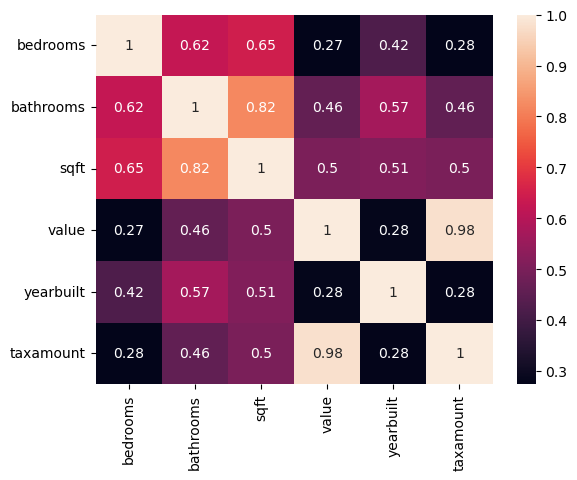

In [101]:
sns.heatmap(data = feature_corr, annot=True)
plt.show()

Really, the only other features that have somewhat strong correlation is:
- sqft + bathrooms = 0.82
- sqft + bedrooms = 0.65
- bedrooms + bathrooms = 0.62

12) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- Even though it's the strongest correlation, realistically, we will have to remove taxamount from modeling.
- Sqft is the best predictor of price at around 0.58. We will probably send in bedrooms and bathrooms too. 
- Will probably want to snip outliers even more. Maybe houses with >0 bedrooms and baths. Sqft < 100.
- (Ended up reducing bedrooms and bathrooms to <= 7 if we're doing just one single family home).

In [112]:
#Verifying code to put into wrangle file.

zillow.sqft[(zillow.sqft < zillow.sqft.quantile(.99)) & (zillow.sqft > 100)]

4          3633
6          1620
7          2077
11         1200
14          171
           ... 
2152855    1809
2152858    2262
2152859    3127
2152861    1974
2152862    2110
Name: sqft, Length: 2084677, dtype: int64

13) Explore your dataset with any other visualizations you think will be helpful.